In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt", header=None)

X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])]
X_val = X_test_val[round(0.9*X_test_val.shape[0]):]
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])]
y_val = y_test_val[round(0.9*y_test_val.shape[0]):]

X_train = np.reshape(X_train, [X_train.shape[0], 1, X_train.shape[1]])
y_train = to_categorical(y_train)

X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

labels.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6, 2), (7352, 1, 561), (7352, 7), (2652, 1, 561), (2652, 7))

In [2]:
from keras import Sequential
from keras.layers import *
from keras.optimizers import *
import keras

modelo = Sequential()
modelo.add(GRU(268, return_sequences=True))
modelo.add(GRU(286))
modelo.add(BatchNormalization())
modelo.add(Dense(7, activation="softmax"))

modelo.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy", "precision", "recall", "f1_score"])

In [3]:
historico = modelo.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8337 - f1_score: 0.7128 - loss: 0.4589 - precision: 0.9033 - recall: 0.7327 - val_accuracy: 0.9627 - val_f1_score: 0.8287 - val_loss: 0.2703 - val_precision: 0.9754 - val_recall: 0.9390
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9469 - f1_score: 0.8122 - loss: 0.1992 - precision: 0.9604 - recall: 0.9386 - val_accuracy: 0.9831 - val_f1_score: 0.8400 - val_loss: 0.1035 - val_precision: 0.9863 - val_recall: 0.9797
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9612 - f1_score: 0.8247 - loss: 0.0924 - precision: 0.9706 - recall: 0.9537 - val_accuracy: 0.9966 - val_f1_score: 0.8531 - val_loss: 0.0518 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9672 - f1_score: 0.8305 - loss: 0.0543 - precision: 0.9713 - recall: 0.9633 - val_accuracy: 0.9898 - val_f1_score: 0.8449 - val_loss: 0.0385 - val_precision: 0.9898 - val_rec

In [4]:
_, precisao, precision, recall, f1_score = modelo.evaluate(X_test, y_test)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score[-1]*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - f1_score: 0.7803 - loss: 0.0673 - precision: 0.9275 - recall: 0.9267
Precisão do modelo: 93.25037598609924 %
Precision do modelo: 93.31318736076355 %
Recall do modelo: 93.13725233078003 %
F1-Score do modelo: 100.0 %


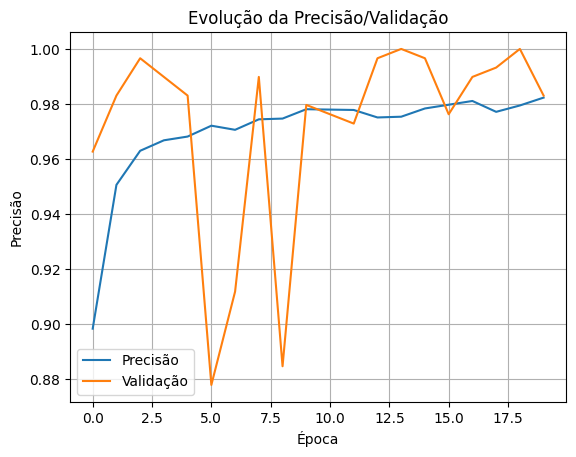

In [5]:
import matplotlib.pyplot as plt

accuracy = historico.history["accuracy"]
val_accuracy = historico.history["val_accuracy"]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.title("Evolução da Precisão/Validação")
plt.xlabel("Época")
plt.ylabel("Precisão")
plt.legend(["Precisão", "Validação"])

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


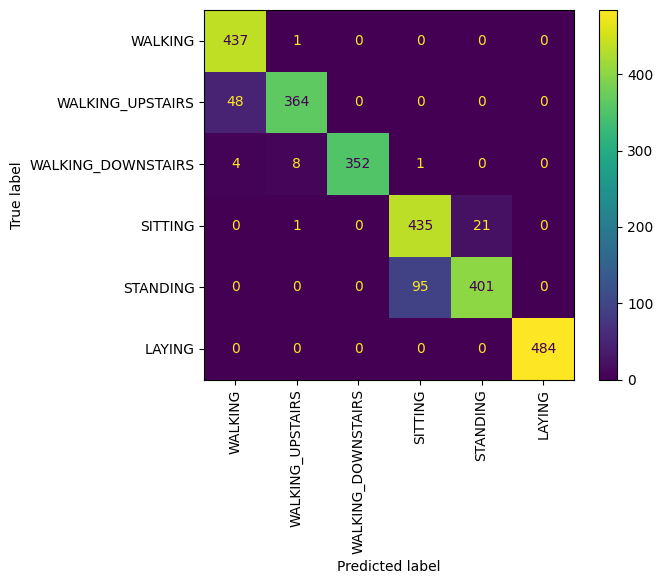

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = modelo.predict(X_test)
y_previsto = np.argmax(y_previsto, axis=1)
y_real = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")